In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("apples_and_oranges.csv")
data.head

<bound method NDFrame.head of     Weight  Size   Class
0       69  4.39  orange
1       69  4.21  orange
2       65  4.09  orange
3       72  5.85   apple
4       67  4.70  orange
5       73  5.68   apple
6       70  5.56   apple
7       75  5.11   apple
8       74  5.36   apple
9       65  4.27  orange
10      73  5.79   apple
11      70  5.47   apple
12      74  5.53   apple
13      68  4.47  orange
14      74  5.22   apple
15      65  4.48  orange
16      69  4.66  orange
17      75  5.25   apple
18      67  4.18  orange
19      74  5.50   apple
20      66  4.13  orange
21      70  4.83  orange
22      69  4.61  orange
23      68  4.08  orange
24      67  4.25  orange
25      71  5.35   apple
26      67  4.01  orange
27      70  4.22  orange
28      74  5.25   apple
29      71  5.26   apple
30      73  5.78   apple
31      66  4.68  orange
32      72  5.72   apple
33      73  5.17   apple
34      68  4.83  orange
35      69  4.11  orange
36      69  4.76  orange
37      74  5.48   a

In [5]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [6]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [7]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [8]:
Y_pred = adaboost.predict(X_test)

In [9]:
test_set["Predictions"] = Y_pred

C:\Users\emana\AppData\Local\Temp/ipykernel_9468/1493348970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)


Accuracy Of AdaBoost For The Given Dataset :  1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


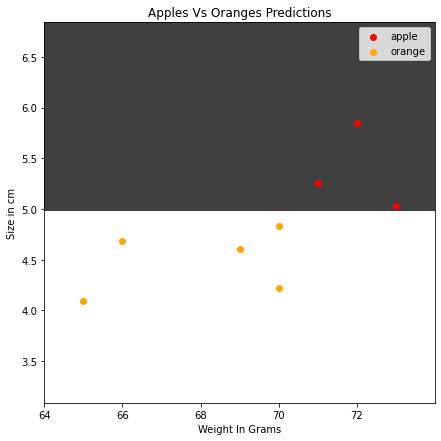

In [22]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

#Fitting the encoded data to AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

#Visualising
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, adaboost.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0] , X_set[y_set == j, 1],
            c = ListedColormap(('red', 'orange'))(i), label = j)



plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()